<a href="https://colab.research.google.com/github/JoJo7292/Joseph/blob/master/Titanic%20kaggle%205.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('train.csv')
df

,traveller_ID,ticket_class,name,sex,age,Siblings_spouses,Parchil,TickNum,fare,cabin,embarked,MedBoat,Survived
0,1214,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S,NaN,0
1,677,3,"Bostandyeff, Mr. Guentcho",male,26.0000,0,0,349224,7.8958,NaN,S,NaN,0
2,534,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0000,0,0,250655,26.0000,NaN,S,11,1
3,1174,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,NaN,0
4,864,3,"Henriksson, Miss. Jenny Lovisa",female,28.0000,0,0,347086,7.7750,NaN,S,NaN,0
5,895,3,"Johnson, Miss. Eleanor Ileen",female,1.0000,1,1,347742,11.1333,NaN,S,15,1
6,813,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,0
7,745,3,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0000,0,0,382650,6.9500,NaN,Q,15,1
8,1030,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,NaN,0
9,1072,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,NaN,0


In [ ]:
df.describe()

,traveller_ID,ticket_class,age,Siblings_spouses,Parchil,fare,Survived
count,916.000000,916.000000,729.000000,916.000000,916.000000,915.000000,916.000000
mean,656.248908,2.305677,29.102309,0.539301,0.386463,33.709221,0.361354
std,381.176191,0.841811,13.866954,1.082188,0.893933,52.840656,0.480655
min,0.000000,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,328.250000,2.000000,21.000000,0.000000,0.000000,7.925000,0.000000
50%,670.000000,3.000000,28.000000,0.000000,0.000000,14.500000,0.000000
75%,974.250000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000
max,1308.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
df.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                 187
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  1
cabin               712
embarked              1
MedBoat             589
Survived              0
dtype: int64

In [ ]:
drop_col = ['fare', 'traveller_ID', 'cabin', 'TickNum', 'name', 'MedBoat']
df.drop(drop_col, axis =1, inplace=True)
df.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived
0,3,male,NaN,0,0,S,0
1,3,male,26.0,0,0,S,0
2,2,female,19.0,0,0,S,1
3,3,female,NaN,8,2,S,0
4,3,female,28.0,0,0,S,0


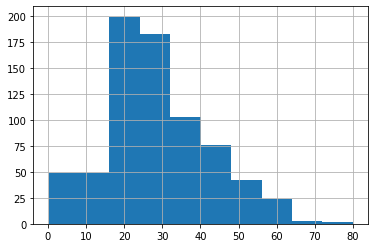

In [ ]:
df.age.dropna().hist()

In [ ]:
df['age'] = df['age'].fillna(24)
df.isnull().sum()

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            1
Survived            0
dtype: int64

In [ ]:
df['embarked'] = df['embarked'].fillna("S")
df.isnull().sum()
#df.embarked.values

ticket_class        0
sex                 0
age                 0
Siblings_spouses    0
Parchil             0
embarked            0
Survived            0
dtype: int64

In [ ]:
df_dummy = pd.get_dummies(df[['sex', "embarked"]])

In [ ]:
df = pd.concat([df, df_dummy], axis=1)

In [ ]:
df

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,male,24.0000,0,0,S,0,0,1,0,0,1
1,3,male,26.0000,0,0,S,0,0,1,0,0,1
2,2,female,19.0000,0,0,S,1,1,0,0,0,1
3,3,female,24.0000,8,2,S,0,1,0,0,0,1
4,3,female,28.0000,0,0,S,0,1,0,0,0,1
5,3,female,1.0000,1,1,S,1,1,0,0,0,1
6,3,male,24.0000,0,0,S,0,0,1,0,0,1
7,3,female,30.0000,0,0,Q,1,1,0,0,1,0
8,3,male,24.0000,0,0,Q,0,0,1,0,1,0
9,3,male,24.0000,0,0,Q,0,0,1,0,1,0


In [ ]:
df["younger"] = df["age"] <18
df["older"] = df["age"] > 65
df

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked,Survived,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,younger,older
0,3,male,24.0000,0,0,S,0,0,1,0,0,1,False,False
1,3,male,26.0000,0,0,S,0,0,1,0,0,1,False,False
2,2,female,19.0000,0,0,S,1,1,0,0,0,1,False,False
3,3,female,24.0000,8,2,S,0,1,0,0,0,1,False,False
4,3,female,28.0000,0,0,S,0,1,0,0,0,1,False,False
5,3,female,1.0000,1,1,S,1,1,0,0,0,1,True,False
6,3,male,24.0000,0,0,S,0,0,1,0,0,1,False,False
7,3,female,30.0000,0,0,Q,1,1,0,0,1,0,False,False
8,3,male,24.0000,0,0,Q,0,0,1,0,1,0,False,False
9,3,male,24.0000,0,0,Q,0,0,1,0,1,0,False,False


In [ ]:
df.drop(["sex", "embarked"], axis=1, inplace=True)

In [ ]:
# train.csv
y = df['Survived'] #target 
x = df.drop(['Survived'], axis=1) #feature

In [ ]:
# test.csv
test = pd.read_csv("test.csv")

test.isnull().sum()

traveller_ID          0
ticket_class          0
name                  0
sex                   0
age                  76
Siblings_spouses      0
Parchil               0
TickNum               0
fare                  0
cabin               302
embarked              1
MedBoat             234
dtype: int64

In [ ]:
ID = test["traveller_ID"]

to_drop=["fare", "cabin", "name", "MedBoat", "traveller_ID", "TickNum"]

test.drop(to_drop, axis=1, inplace=True)

In [ ]:
test.head()

,ticket_class,sex,age,Siblings_spouses,Parchil,embarked
0,3.0,male,35.0,0.0,0.0,S
1,3.0,male,20.0,1.0,1.0,C
2,3.0,male,NaN,0.0,0.0,S
3,3.0,male,NaN,0.0,0.0,S
4,3.0,male,NaN,0.0,0.0,Q


In [ ]:
test["age"] = test["age"].fillna(24)

test["embarked"] = test["embarked"].fillna("S")

dummy = pd.get_dummies(test[["sex","embarked"]])

test = pd.concat([test, dummy], axis=1)

test.drop(["sex", "embarked"], axis=1, inplace=True)

test.head()

,ticket_class,age,Siblings_spouses,Parchil,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3.0,35.0,0.0,0.0,0,1,0,0,1
1,3.0,20.0,1.0,1.0,0,1,1,0,0
2,3.0,24.0,0.0,0.0,0,1,0,0,1
3,3.0,24.0,0.0,0.0,0,1,0,0,1
4,3.0,24.0,0.0,0.0,0,1,0,1,0


In [ ]:
test["younger"] = test["age"] < 18

test["older"] = test["age"] > 65

In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21)

In [ ]:
#fitting logistic regression to the training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 42)
classifier.fit(x_train, y_train)

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

C:\Users\Chinonye Chibueze\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Chinonye Chibueze\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
acc_log

79.37

In [ ]:
#Decision Tree


decision_tree = DecisionTreeClassifier() 
decision_tree.fit(x_train, y_train)  
y_predDT = decision_tree.predict(x_test)  
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

In [ ]:
acc_decision_tree

92.9

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_predRF = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

In [ ]:
acc_random_forest

92.9

In [ ]:
#y_pred = classifier.predict(x_test)

In [ ]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_predRF))
print("f1_score: ", metrics.f1_score(y_test, y_predRF))
print("Recall: ", metrics.recall_score(y_test, y_predRF))

Accuracy:  0.7771739130434783
f1_score:  0.6611570247933884
Recall:  0.6451612903225806


In [ ]:
RandTestPred= random_forest.predict(test)

random_forest.score(x_train, y_train)

In [ ]:
acc_randForest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_randForest

92.9

In [ ]:
len(RandTestPred)

393

In [ ]:
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_predRF))
print("f1_score: ", metrics.f1_score(y_test, y_predRF))
print("Recall: ", metrics.recall_score(y_test, y_predRF))

Accuracy:  0.7771739130434783
f1_score:  0.6611570247933884
Recall:  0.6451612903225806


In [ ]:
#classifier.score(x,y, metrics="recall")

In [ ]:
my_result = pd.read_csv("sample_submission.csv")

my_result["Survived"] = RandTestPred

my_result

,traveller_ID,Survived
0,1148,0
1,1049,1
2,982,0
3,808,0
4,1195,0
5,240,0
6,1118,0
7,596,0
8,924,0
9,65,1


In [ ]:
my_result.to_csv("fifthSub.csv", index=False)